# Project: Investigate a Dataset (The Movies Data Base)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project we will be analysing a movie dataset, so that we can determine what factors lead to a profitable film.
>
>we will answer these questions : 
___
> 1. How the profit of movies changed Over time? 
> 2. What are the most successful genres?
> 3. What is the average budget that can lead to a successful movie?
> 4. Who are the most loved characters?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> _In this section of the report, we will load our data and check for cleanliness, and then trim and clean the dataset for analysis._
____
### General Properties

In [2]:
#loading the dataset and print the Five first rows in our dataset
df = pd.read_csv('/Users/lahsini/Desktop/tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> _The Min value in Runtime, Budget, and Revenue columns is 0. It does not make sense, so we are going to delete the rows having this value._

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Observing this dataset
   > As we can see, based on the questions asked in the introduction section, there's some columns
that we do not need in our analysis, like **(id, imdb_id, original_title, homepage, ...)**. So we are going to delete them.

   > There's some rows with null values, we are going to remove them.

   > We notice that our dataset has only the budget and the revenue **(Without the profit made)**. So, to make the analysis better we are going to create a new column that calculate the profit of the movie



### Data Cleaning (Drop nulls, and removing unused informations)

    In this section we are going to:
   > 1. Delete unwanted columns.
   > 2. Drop nulls if exist.
   > 3. Delete duplicates if exist.
   > 4. Remove Rows having 0 as a value from Runtime, Budget, and Revenue columns
   > 5. Changing release date column into date format.
   > 6. Create a new column that calculate the profit made by each movie.

###### 1. Delete unwanted columns

In [6]:
#Create a list of columns to delete
columns_to_delete = ['id', 'imdb_id', 'popularity', 'homepage', 'keywords', 'overview', 'vote_count', 'vote_average']

#Delete defined columns 
df = df.drop(columns_to_delete, 1)

#check the Data 
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09


###### 2. Drop Nulls

In [7]:
#Check if our dataset contains null values
df.isnull().sum()

budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
runtime                    0
genres                    23
production_companies    1030
release_date               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
#Drop Null Rows
df.dropna(inplace=True)
df.isnull().sum()

budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
runtime                 0
genres                  0
production_companies    0
release_date            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

###### 3. Drop Duplicated Rows

In [9]:
#Check if there is some duplicates in our dataset
df.duplicated().sum()

1

In [10]:
#Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

###### 4. Remove Rows with value 0 from Runtime, Budget, and Revenue columns

In [11]:
#Runtime Column
df.drop(df[df['runtime']==0].index, inplace=True)

#Budget Column
df.drop(df[df['budget']==0].index, inplace=True)

#Revenue column
df.drop(df[df['revenue']==0].index, inplace=True)

#Check the min values of each of these columns
df['runtime'].min(), df['budget'].min(), df['revenue'].min()

(26, 1, 2)

###### 5. Change release_date column into date format.

In [12]:
df.release_date = pd.to_datetime(df['release_date'])

###### 6. Create a new column that calculate the profit made by each movie.

In [13]:
#Insert the profit column and place it as the third column of our dataset
df.insert(2, 'profit', df['revenue']-df['budget'])

#Check the data
df.head(1)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.379999e+08,1.392446e+09


> *__Our dataset is now cleaned and has all the data we need to analyse it. We are good now to explore it, so that we can draw some conclusions and answer the questions already asked.__*

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( How the profit of movies changed over time? )

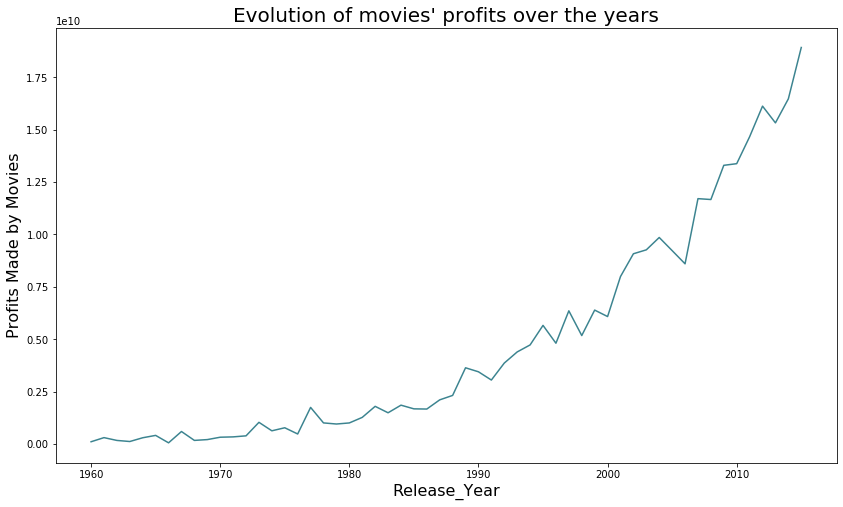

In [14]:
# A line plot is the best fit for this question and we are going to group by
# release_year to count the number of movies with the same release year
profit_prod = df.groupby('release_year')['profit'].sum()

#Plot the data
profit_prod.plot(kind='line', figsize=(14,8), color = '#3c8490')

#create the title, xlabel and the ylabel of this plot
plt.title('Evolution of movies\' profits over the years', fontsize = 20)
plt.xlabel('Release_Year', fontsize = 16)
plt.ylabel('Profits Made by Movies', fontsize = 16);

> We notice that the profit made by movies in the last few years have grown enormously.

> We have to figure out why this happened. So we are going to see if the movies' budgets and number have the same patterns in these years.

**_Plot the evolution of budgets over the years to see if there was a change in these last years_**

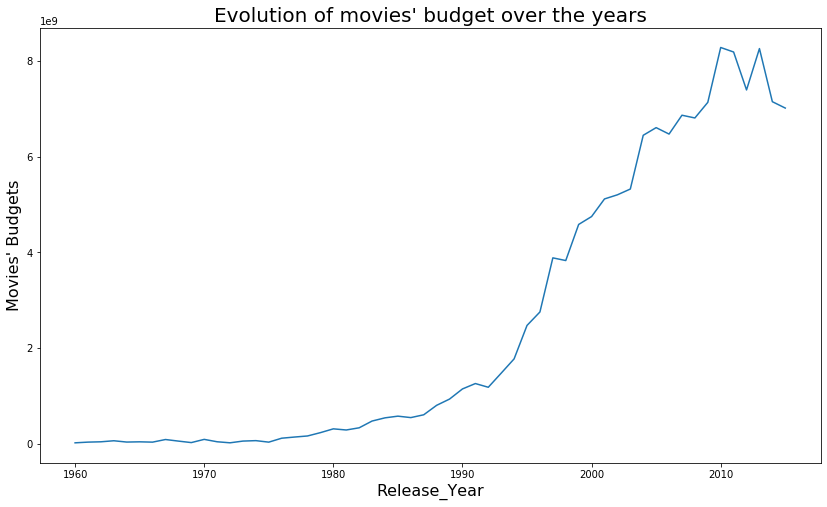

In [15]:
# A line plot is the best fit for this question and we are going to group by
# release_year to count the number of movies with the same release year
profit_prod = df.groupby('release_year')['budget'].sum()

#Plot the data
profit_prod.plot(kind='line', figsize=(14,8))

#create the title, xlabel and the ylabel of this plot
plt.title('Evolution of movies\' budget over the years', fontsize = 20)
plt.xlabel('Release_Year', fontsize = 16)
plt.ylabel('Movies\' Budgets', fontsize = 16);

**_Plot the evolution of the Number of movies over the years to see if there was a change in these last years_**

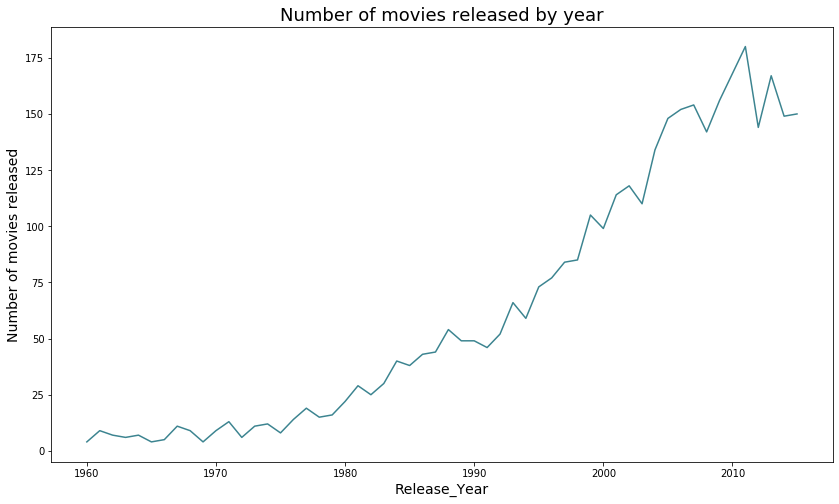

In [16]:
df.groupby('release_year')['profit'].count().plot(kind = 'line', color = '#3c8490', figsize = (14,8))
plt.title('Number of movies released by year', fontsize = 18)
plt.xlabel('Release_Year', fontsize = 14)
plt.ylabel('Number of movies released', fontsize = 14);

> _So as excpected,the number of movies and the budget have been growing as well over the years, especially, in the last 20 years or so. the growth in number lead to a variety in term of movies and the profit made by these movies._

> _The budget can help in improving the movie's quality in order to attract more viewer and get more profit._

### Research Question 2  (What are the most successful genres?)

In [17]:
# Create a list of movies making profit more than or equal the average profit of the market.
profitable_film = df[df['profit']>=(df['profit'].mean())]

#Get the length of this list (number of movies making profit more than or equal to the average.)
len(profitable_film)

1005

> __1005 movies in our dataset that made more than the average.__

In [18]:
#Create a function in order to get genres and Cast arguments seperately 
#(without repeating the same process with the Cast column)
def new (column):
    
    #take the column and seperate the string by '|'
    new = profitable_film[column].str.cat(sep = '|')
    
    #give pandas series and store the values seperately
    new = pd.Series(new.split('|'))
    
    #arrange the dataset in descending order
    total = new.value_counts(ascending = False)  
    return total

In [19]:
# Assigne the genres list to a variable
total = new('genres')

#get the most 10 profitable genres
total.head(10)

Comedy             366
Action             365
Drama              339
Adventure          308
Thriller           289
Family             182
Science Fiction    167
Romance            163
Fantasy            157
Crime              135
dtype: int64

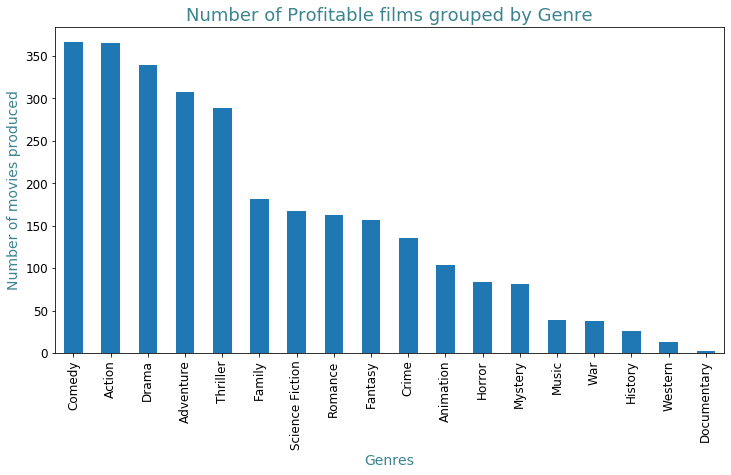

In [20]:
total.plot.bar(figsize =(12,6), fontsize = 12)
plt.title('Number of Profitable films grouped by Genre', fontsize = 18, color='#3c8490')
plt.xlabel('Genres', fontsize = 14, color='#3c8490')
plt.ylabel('Number of movies produced', fontsize = 14, color='#3c8490')
plt.show();

> Comedy films are the most making more or equal the average of the profit, followed by Action, then Drama, after that Thriller, Family followed by Science Fiction movies...

> But is this because of the number of comedy films. To see if the number of comedy movies are more than other movies, we are going to get the number of movies in our entire dataset based on genre to know if this profit is caused by the number of comedy films.

In [21]:
#Create a function in order to get genres and Cast arguments seperately 
#(without repeating the same process with the Cast column)
def new (column):
    
    #take the column and seperate the string by '|'
    new = df[column].str.cat(sep = '|')
    
    #give pandas series and store the values seperately
    new = pd.Series(new.split('|'))
    
    #arrange the dataset in descending order
    total = new.value_counts(ascending = False)  
    return total

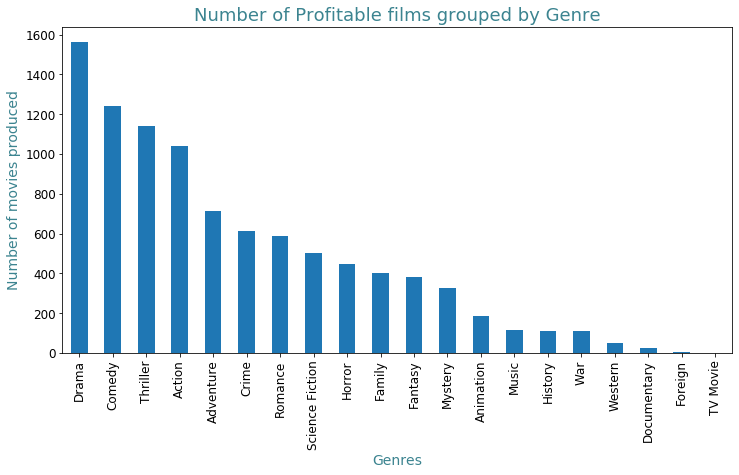

In [22]:
# Assigne the genres list to a variable
total = new('genres')

#plot the number of films in our entire data set grouped by genre
total.plot.bar(figsize =(12,6), fontsize = 12)
plt.title('Number of Profitable films grouped by Genre', fontsize = 18, color='#3c8490')
plt.xlabel('Genres', fontsize = 14, color='#3c8490')
plt.ylabel('Number of movies produced', fontsize = 14, color='#3c8490')
plt.show();

> Based on this graph, we can say that comedy films are more successful, because the number of comedy films are less than Drama, and Drama films are more than Action films in our entire dataset, but the number of Comedy movies making more or equal the average of the profit are more than those of Drama, the same thing for those of Action genre. So Action films get the second place in our profitable films, and we can say that this happened because people are more likely to watch Comedy and Action movies more than Drama films although the production of Drama film is higher than these other genres.

### Research Question 3  ( What is the average runtime and the Budget leading to profitable film ? )

In [23]:
#Get the runtime on average leading to a profitable film
profitable_film['runtime'].mean()

114.92039800995025

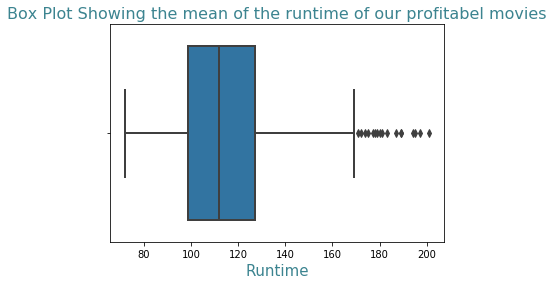

In [24]:
#plot the box plot of our runtime variable
#giving our figure a size


sns.boxplot(profitable_film['runtime'], linewidth = 2);
plt.title('Box Plot Showing the mean of the runtime of our profitabel movies', fontsize = 16, color='#3c8490')
plt.xlabel('Runtime', fontsize = 15, color='#3c8490')
plt.show();

> __The mean of our profitable movies is 114.92.__

In [25]:
#How much does it cost on everage to produce a profitable film
profitable_film['budget'].mean()

67962454.83880597

>__It costs for a film to be successful arround `67,962,454.8388` on average.__

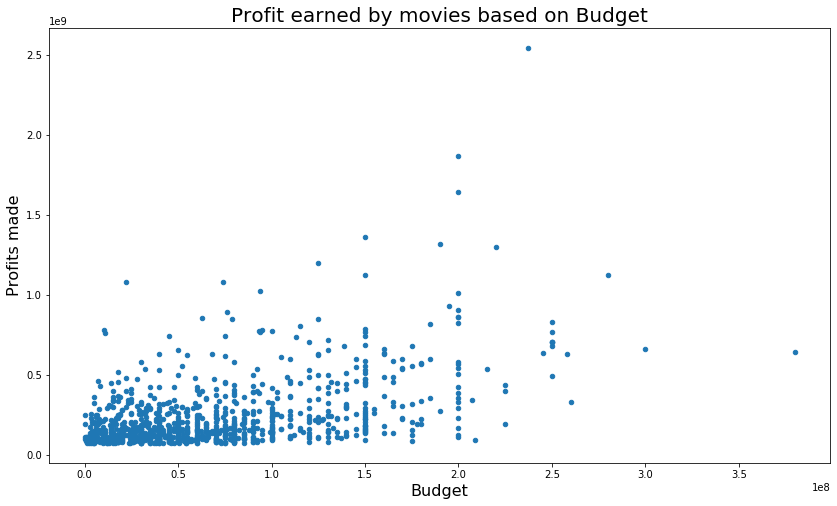

In [26]:
# plot the relationship between the budget and the profit made by a film
profitable_film.plot.scatter(x = 'budget', y = 'profit', figsize = (14,8))
plt.title('Profit earned by movies based on Budget', fontsize = 20)
plt.xlabel('Budget', fontsize = 16)
plt.ylabel('Profits made', fontsize = 16);

>*As we can see from this figure the, there isn't a linear relationship between the profit made and the budget of profitable film. But we can observe that a large number of films have a budget between `30.000.000 and 80.000.000 dollars`* 

### Research Question 4  ( Who are the most three loved characters leading to a profitable film ? )

In [27]:
total = new('cast')
total.head(3)

Robert De Niro       50
Bruce Willis         44
Samuel L. Jackson    43
dtype: int64

> _The most three actors that their movies made a very respected profit are; `Tom Cruise`, `Tom Hanks`, and `Brad Pitt`._

In [28]:
df['profit'].mean()

75701805.3493228

<a id='conclusions'></a>
## Conclusions

> Based on the data we have got and the exploration we have in our hand, we can assume that a film to be successful, it has to fulfill these conditions : 

> 1. The film to be on the top 4, it must be one of these genres : Comedy, Action, Drama, Adventure.
> 2. It will cost arround 65.000.000
> 3. It must have one of these characters : Robert De Niro, Bruce Willis, Samuel L. Jackson. 
> 4. It must have a duration about 114 minutes.

> `Limitation:` We have done our analysis filtering movies having a profit around `$75.701.805`. this might not be a good idea, because some genres might be influence by the number of movies produced. As well as the currency of the revenue and the budget is not mentioned in the report. So I decided to do the analysis based on **dollars**.